### Importación de datos



In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head(100)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Microondas,Electrodomésticos,722600.0,36700.0,30/09/2021,Ángel Rodriguez,Cúcuta,5,Nequi,1,7.89391,-72.50782
96,Olla de presión,Artículos para el hogar,78300.0,4600.0,27/09/2022,Mariana Herrera,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
97,Mesa de comedor,Muebles,279300.0,15300.0,03/05/2022,Santiago Silva,Bogotá,2,Tarjeta de crédito,6,4.60971,-74.08175
98,Bicicleta,Deportes y diversión,475100.0,23500.0,13/12/2020,Juan Fernandez,Medellín,5,Tarjeta de crédito,4,6.25184,-75.56359


#1. Análisis de facturación



In [113]:
facturacion_tienda1 = tienda1['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

facturaciones = {
    'Tienda 1': facturacion_tienda1,
    'Tienda 2': facturacion_tienda2,
    'Tienda 3': facturacion_tienda3,
    'Tienda 4': facturacion_tienda4
}
mayor_facturacion = max(facturaciones, key = facturaciones.get)
valor_max = facturaciones[mayor_facturacion]
print(f'La tienda con mayor facturacíon es: {mayor_facturacion} \ncon un total de: {valor_max}')

La tienda con mayor facturacíon es: Tienda 1 
con un total de: 1150880400.0


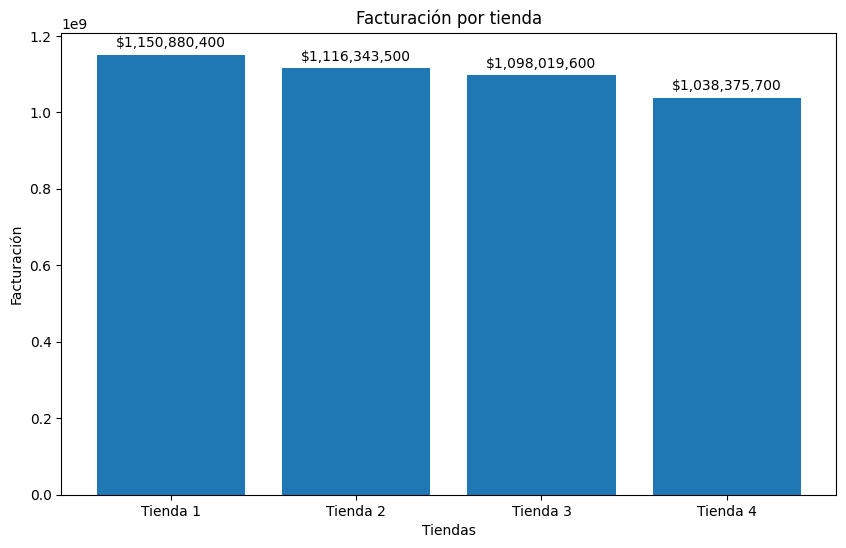

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(facturaciones.keys(), facturaciones.values())
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.title('Facturación por tienda')
for i, (tienda, valor) in enumerate(facturaciones.items()):
    plt.text(i, valor + max(facturaciones.values())*0.01, f"${valor:,.0f}", ha='center', va='bottom')

plt.show()


# 2. Ventas por categoría

In [115]:
ventas_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

In [116]:
print(f'Ventas por categoría de cada tienda: \nTienda 1: {ventas_por_categoria_tienda1}\n \nTienda 2: {ventas_por_categoria_tienda2}\n \nTienda 3: {ventas_por_categoria_tienda3}\n \nTienda 4: {ventas_por_categoria_tienda4}')

Ventas por categoría de cada tienda: 
Tienda 1: Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
 
Tienda 2: Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
 
Tienda 3: Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicale

In [117]:
categoria_max_tienda1 = ventas_por_categoria_tienda1.idxmax()
categoria_max_tienda2 = ventas_por_categoria_tienda2.idxmax()
categoria_max_tienda3 = ventas_por_categoria_tienda3.idxmax()
categoria_max_tienda4 = ventas_por_categoria_tienda4.idxmax()

print(f"La categoría más vendida en Tienda 1 es: {categoria_max_tienda1}")
print(f"La categoría más vendida en Tienda 2 es: {categoria_max_tienda2}")
print(f"La categoría más vendida en Tienda 3 es: {categoria_max_tienda3}")
print(f"La categoría más vendida en Tienda 4 es: {categoria_max_tienda4}")


La categoría más vendida en Tienda 1 es: Electrónicos
La categoría más vendida en Tienda 2 es: Electrónicos
La categoría más vendida en Tienda 3 es: Electrónicos
La categoría más vendida en Tienda 4 es: Electrónicos


In [118]:
monto_max_tienda1 = ventas_por_categoria_tienda1.max()
monto_max_tienda2 = ventas_por_categoria_tienda2.max()
monto_max_tienda3 = ventas_por_categoria_tienda3.max()
monto_max_tienda4 = ventas_por_categoria_tienda4.max()


In [124]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
categorias = [
    categoria_max_tienda1,
    categoria_max_tienda2,
    categoria_max_tienda3,
    categoria_max_tienda4
]
montos = [
    ventas_por_categoria_tienda1.max(),
    ventas_por_categoria_tienda2.max(),
    ventas_por_categoria_tienda3.max(),
    ventas_por_categoria_tienda4.max()
]

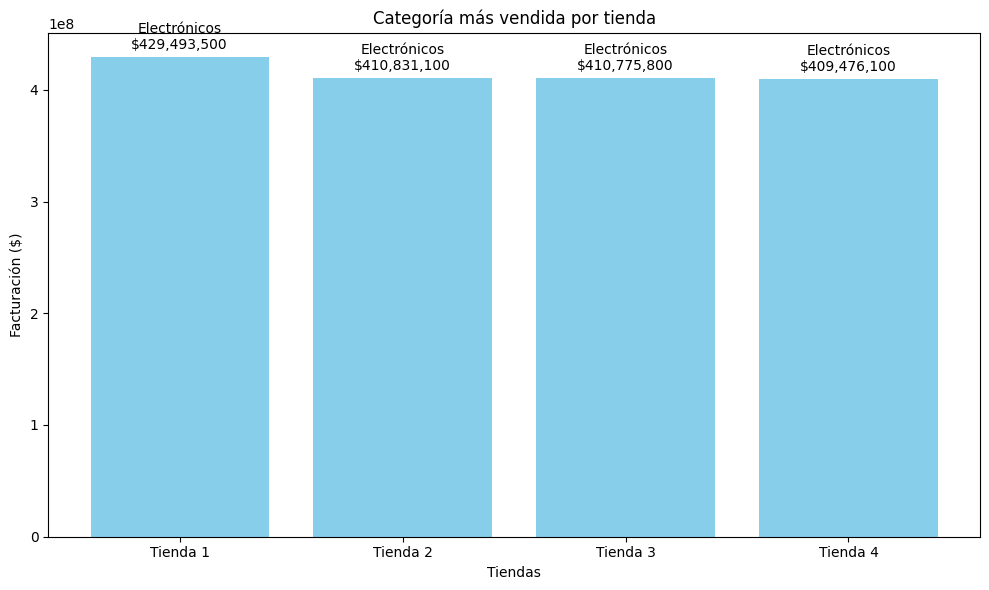

In [120]:
plt.figure(figsize=(10, 6))
plt.bar(tiendas, montos, color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Facturación ($)')
plt.title('Categoría más vendida por tienda')

# Agregar el nombre de la categoría y monto sobre cada barra
for i in range(len(tiendas)):
    plt.text(i, montos[i] + max(montos)*0.01,
             f"{categorias[i]}\n${montos[i]:,.0f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [122]:
promedio_tienda1 = tienda1['Calificación'].mean()
promedio_tienda2 = tienda2['Calificación'].mean()
promedio_tienda3 = tienda3['Calificación'].mean()
promedio_tienda4 = tienda4['Calificación'].mean()

In [173]:
print(f'Promedio de calificación de cada tienda: \nTienda 1: {promedio_tienda1}\n \nTienda 2: {promedio_tienda2}\n \nTienda 3: {promedio_tienda3}\n \nTienda 4: {promedio_tienda4}')


Promedio de calificación de cada tienda: 
Tienda 1: 3.976685036032217
 
Tienda 2: 4.037303942348453
 
Tienda 3: 4.048325561678677
 
Tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

In [171]:
ventas_por_producto1 = tienda1.groupby('Producto')['Cantidad de cuotas'].sum()
nombre_maximo1 = ventas_por_producto1.idxmax()
cantidad_maximo1 = max(tienda1.groupby('Producto')['Cantidad de cuotas'].sum())

nombre_minimo1 = ventas_por_producto1.idxmin()
cantidad_minimo1 = min(tienda1.groupby('Producto')['Cantidad de cuotas'].sum())

In [170]:
ventas_por_producto2 = tienda2.groupby('Producto')['Cantidad de cuotas'].sum()

nombre_maximo2 = ventas_por_producto2.idxmax()
cantidad_maximo2 = max(tienda2.groupby('Producto')['Cantidad de cuotas'].sum())

nombre_minimo2 = ventas_por_producto2.idxmin()
cantidad_minimo2 = min(tienda2.groupby('Producto')['Cantidad de cuotas'].sum())

In [169]:
ventas_por_producto3 = tienda3.groupby('Producto')['Cantidad de cuotas'].sum()

nombre_maximo3 = ventas_por_producto3.idxmax()
cantidad_maximo3 = max(tienda3.groupby('Producto')['Cantidad de cuotas'].sum())

nombre_minimo3 = ventas_por_producto3.idxmin()
cantidad_minimo3 = min(tienda3.groupby('Producto')['Cantidad de cuotas'].sum())

In [168]:
ventas_por_producto4 = tienda4.groupby('Producto')['Cantidad de cuotas'].sum()

nombre_maximo4 = ventas_por_producto4.idxmax()
cantidad_maximo4 = max(tienda4.groupby('Producto')['Cantidad de cuotas'].sum())

nombre_minimo4 = ventas_por_producto4.idxmin()
cantidad_minimo4 = min(tienda4.groupby('Producto')['Cantidad de cuotas'].sum())

In [172]:
print(f'Tienda 1: \nProducto más vendido: {nombre_maximo1}: {cantidad_maximo1} \nProducto menos vendido: {nombre_minimo1}: {cantidad_minimo1}')
print(f'Tienda 2: \nProducto más vendido: {nombre_maximo2}: {cantidad_maximo2} \nProducto menos vendido: {nombre_minimo2}: {cantidad_minimo2}')
print(f'Tienda 3: \nProducto más vendido: {nombre_maximo3}: {cantidad_maximo3} \nProducto menos vendido: {nombre_minimo3}: {cantidad_minimo3}')
print(f'Tienda 4: \nProducto más vendido: {nombre_maximo4}: {cantidad_maximo4} \nProducto menos vendido: {nombre_minimo4}: {cantidad_minimo4}')

Tienda 1: 
Producto más vendido: Secadora de ropa: 214 
Producto menos vendido: Celular ABXY: 78
Tienda 2: 
Producto más vendido: Iniciando en programación: 223 
Producto menos vendido: Mesa de comedor: 89
Tienda 3: 
Producto más vendido: Bicicleta: 191 
Producto menos vendido: TV LED UHD 4K: 94
Tienda 4: 
Producto más vendido: Dashboards con Power BI: 196 
Producto menos vendido: Armario: 88


In [179]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
productos_maximos = [nombre_maximo1, nombre_maximo2, nombre_maximo3, nombre_maximo4]
productos_minimos = [nombre_minimo1, nombre_minimo2, nombre_minimo3, nombre_minimo4]
cantidades_maximas = [cantidad_maximo1, cantidad_maximo2, cantidad_maximo3, cantidad_maximo4]
cantidades_minimas = [cantidad_minimo1, cantidad_minimo2, cantidad_minimo3, cantidad_minimo4]

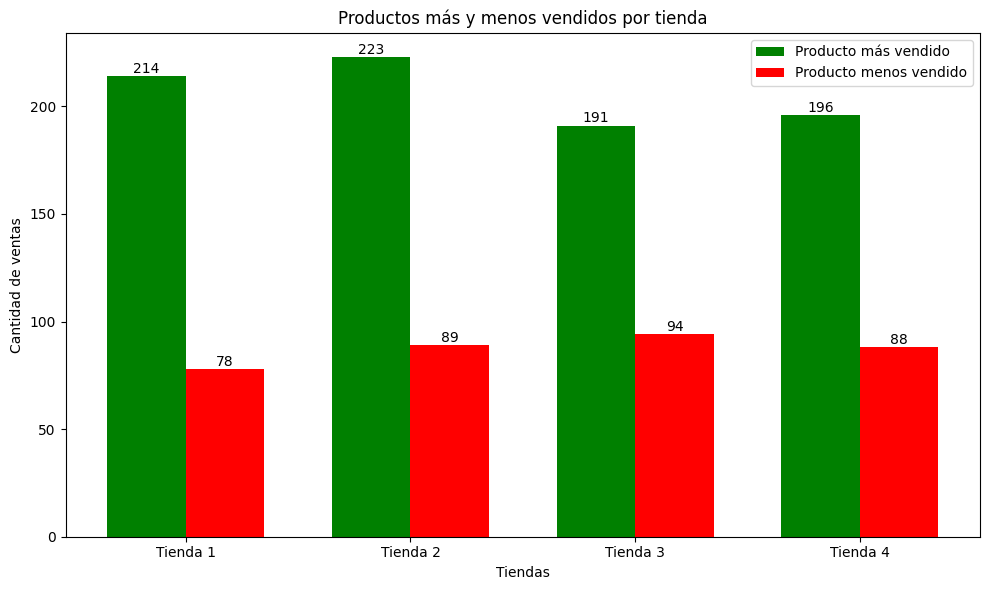

In [182]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(tiendas))
width = 0.35
bars_max = ax.bar(x - width/2, cantidades_maximas, width, label='Producto más vendido', color='green')
bars_min = ax.bar(x + width/2, cantidades_minimas, width, label='Producto menos vendido', color='red')
ax.set_xlabel('Tiendas')
ax.set_ylabel('Cantidad de ventas')
ax.set_title('Productos más y menos vendidos por tienda')
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

for bar in bars_max:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{int(yval)}', ha='center', va='bottom')

for bar in bars_min:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{int(yval)}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [177]:
envio_tienda1 = tienda1['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()


In [178]:
print(f'Promedio de calificación de cada tienda: \nTienda 1: {envio_tienda1}\n \nTienda 2: {envio_tienda2}\n \nTienda 3: {envio_tienda3}\n \nTienda 4: {envio_tienda4}')


Promedio de calificación de cada tienda: 
Tienda 1: 26018.60958033065
 
Tienda 2: 25216.235693090293
 
Tienda 3: 24805.680373039424
 
Tienda 4: 23459.457167090754
